In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 使用Keras自带的mnist工具读取数据（第一次需要联网）

Using TensorFlow backend.


In [2]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

(60000, 784)


In [4]:
import numpy as np
y_train = (np.arange(10) == y_train[:, None]).astype(int)  
y_test = (np.arange(10) == y_test[:, None]).astype(int)
print(y_train.shape)

(60000, 10)


In [5]:
print(y_test[1])

[0 0 1 0 0 0 0 0 0 0]


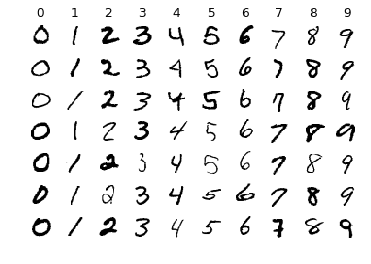

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y == np.argmax(y_train, axis=1))#1代表行
    idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1#将同一类图片显示在同一列
        plt.subplot(samples_per_class, num_classes, plt_idx)
        image = X_train[idx].reshape((28, 28))
        plt.imshow(image, cmap = 'gray_r')
#         print(image)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
import tensorflow as tf
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
# W_1 = tf.Variable(tf.zeros([784, 128]))
#第一层
W_1 = tf.get_variable('W_1', [784, 64], initializer=tf.random_normal_initializer())
# b_1 = tf.Variable(tf.zeros([128]))
b_1 = tf.get_variable('b_1', [64], initializer=tf.random_normal_initializer())
a_1 = tf.matmul(x, W_1) + b_1
z_1 = tf.nn.sigmoid(a_1)

#第二层
# W_2 = tf.Variable(tf.zeros([128, 10]))
W_2 = tf.get_variable('W_2', [64, 32], initializer=tf.random_normal_initializer())
# b_2 = tf.Variable(tf.zeros([10]))
b_2 = tf.get_variable('b_2', [32], initializer=tf.random_normal_initializer())
a_2 = tf.matmul(z_1, W_2) + b_2
z_2 = tf.nn.sigmoid(a_2)

#第三层
# W_3 = tf.Variable(tf.zeros([64, 10]))
W_3 = tf.get_variable('W_3', [32, 10], initializer=tf.random_normal_initializer())
# b_3 = tf.Variable(tf.zeros([10]))
b_3 = tf.get_variable('b_3', [10], initializer=tf.random_normal_initializer())
a_3 = tf.matmul(z_2, W_3) + b_3
z_3 = tf.nn.softmax(a_3)

In [8]:
# Define loss and optimizer
y = tf.placeholder(tf.float32, [None, 10])
#交叉熵
loss = -tf.reduce_sum(y*tf.log(z_3))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)#学习率0.01

Epoch 0 training loss: 45.32290758812113, test acc: 0.5583
Epoch 1 training loss: 38.13674921674252, test acc: 0.607
Epoch 2 training loss: 36.92296396593042, test acc: 0.6097
Epoch 3 training loss: 34.051371880431645, test acc: 0.6225
Epoch 4 training loss: 34.26810026372172, test acc: 0.6591
Epoch 5 training loss: 34.42022273891261, test acc: 0.5966
Epoch 6 training loss: 32.5762021373838, test acc: 0.6705
Epoch 7 training loss: 32.602541483287396, test acc: 0.6854
Epoch 8 training loss: 33.10772573109118, test acc: 0.6404
Epoch 9 training loss: 33.76093805929235, test acc: 0.6898
Epoch 10 training loss: 31.117442189503382, test acc: 0.6427
Epoch 11 training loss: 32.50410244968153, test acc: 0.6684
Epoch 12 training loss: 33.26448558388498, test acc: 0.6371
Epoch 13 training loss: 32.32801531677815, test acc: 0.6294
Epoch 14 training loss: 30.03328798117155, test acc: 0.728
Epoch 15 training loss: 26.110683744141813, test acc: 0.7151
Epoch 16 training loss: 26.860039205185124, test 

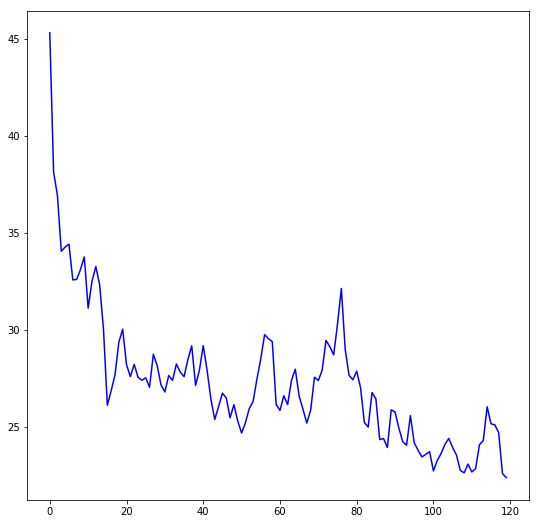

Test some samples


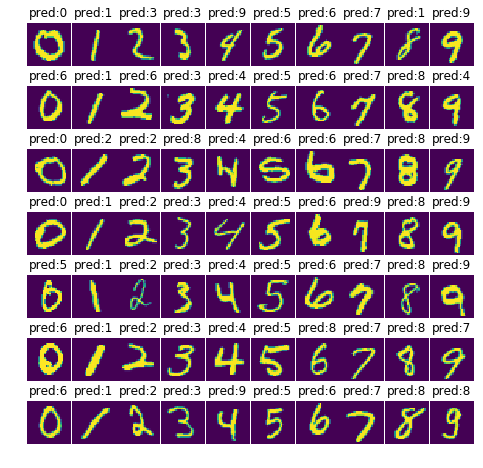

In [12]:
correct_prediction = tf.equal(tf.argmax(a_3, 1), tf.argmax(y, 1)) #(num_training,1),预测正确为1，反之为0
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # tf.int32 注意tf.int32会导致，acc算出来一直为0，reduce_mean可能要求输入为浮点数
init_op = tf.global_variables_initializer()

import matplotlib.gridspec as gridspec

# Train
batch_size = 32
num_epoch = 120
with tf.Session() as sess:
    sess.run(init_op)
    num_train = X_train.shape[0]
    num_batch = int(num_train/batch_size) + 1
    loss_history = []#这种写法每个epoch中，每个样本都被采样了一次，只是顺序不同而已。
    for epoch in range(num_epoch):
        avg_cost = 0
        for batch_idx in range(num_batch):
            batch_mask = np.random.choice(num_train,batch_size)
            X_batch = X_train[batch_mask]
            y_batch = y_train[batch_mask]
            _, c = sess.run([train_step,loss], feed_dict={x: X_batch, y: y_batch})
            avg_cost += c / num_batch
        loss_history.append(avg_cost)
        #evaluate
        acc = sess.run(accuracy_op,feed_dict={x: X_test,y: y_test})
        print("Epoch %s training loss: %s, test acc: %s" % (epoch, avg_cost,acc))
#         pred = sess.run(a_2,feed_dict = {x:np.array([X_test[1]])}) #返回的是numpy.ndarray
        #tensor.eval() #tensor 转换为numpy
#         print(pred)
    
    print('plot...')
    plt.figure(figsize=(9,9))
    plt.plot(list(range(num_epoch)),loss_history,'b')#bo为点图，b为线图
    plt.show()
    
    print('Test some samples')
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(7, 10)
    gs.update(wspace=0.035, hspace=0.1)  # set the spacing between axes.
    for y_, cls in enumerate(classes):
        idxs = np.flatnonzero(y_ == np.argmax(y_test, axis=1))#1代表行
        idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y_ 
            ax = plt.subplot(gs[plt_idx])
            ax.axis('off')
            plt.imshow(X_test[idx].reshape((28, 28)))
            pred = sess.run(a_3,feed_dict = {x:np.array([X_test[idx]])}) #返回的是numpy.ndarray
            pred = np.argmax(pred,axis = 1)[0]
            plt.title('pred:' + str(pred))
    plt.show()

改成了标准的Mini-batch SGD.

http://www.tensorfly.cn/tfdoc/how_tos/variables.html   
保存和恢复变量